In [2]:
print("Hello World")

Hello World


In [3]:
!pip install wordcloud

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string, re, nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#nltk.download('stopwords')
from datetime import datetime
import plotly.express as px
import warnings

In [5]:
#loading the datasets into jupyter notebooks

df_biz = pd.read_csv(r"C:\Users\Austin\Desktop\DATA ANALYSIS PROJECTS\Udemy_data_analytics\business courses.csv") 
df_gfx = pd.read_csv(r"C:\Users\Austin\Desktop\DATA ANALYSIS PROJECTS\Udemy_data_analytics\design courses.csv") 
df_mus = pd.read_csv(r"C:\Users\Austin\Desktop\DATA ANALYSIS PROJECTS\Udemy_data_analytics\music courses.csv") 
df_dev = pd.read_csv(r"C:\Users\Austin\Desktop\DATA ANALYSIS PROJECTS\Udemy_data_analytics\web development.csv")

df_biz.head(2)
#joining the dataframes together
df = pd.concat([df_biz, df_gfx, df_mus, df_dev])


#sample the first rows of the dataframe
print('\n')
print("This combined dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]) )
df.head(2)



This combined dataset has 3207 rows and 13 columns


course_id                                       course_title  price  \
0      49798  Bitcoin or How I Learned to Stop Worrying and ...      0   
1      48841    Accounting in 60 Minutes - A Brief Introduction      0   

   num_subscribers  num_reviews  num_lectures           level  Rating  \
0            65576          936            24      All Levels    0.56   
1            56659         4397            16  Beginner Level    0.95   

   content_duration       Date         Time Free/paid          Category  
0               8.0  4/20/2013   5:25:22 AM      Free  Business Courses  
1               1.5   4/8/2013  12:39:25 AM      Free  Business Courses

In [ ]:
#summary statistics of the dataframe

df.describe()

Data Wrangling and Data cleaning

In [ ]:
#check data types and missing values

df.info()

In [8]:
# check and drop duplicates
df[df.duplicated()]

#drop rows with missing values
df.dropna(inplace=True)

#confirm there is no more null values
df.isnull().sum()

course_id           0
course_title        0
price               0
num_subscribers     0
num_reviews         0
num_lectures        0
level               0
Rating              0
content_duration    0
Date                0
Time                0
Free/paid           0
Category            0
dtype: int64

In [9]:
"""
We do not need all the attributes for our analysis; therefore we choose only the relevant ones to study and drop the rest.
"""
df = df.drop(['num_reviews', 'course_id', 'num_lectures','content_duration'], axis = 1)



In [10]:
df.head()

course_title  price  num_subscribers  \
0  Bitcoin or How I Learned to Stop Worrying and ...      0            65576   
1    Accounting in 60 Minutes - A Brief Introduction      0            56659   
2               Stock Market Investing for Beginners      0            50855   
3                 Introduction to Financial Modeling      0            29167   
4         The Complete Financial Analyst Course 2017    195            24481   

            level  Rating        Date         Time Free/paid          Category  
0      All Levels    0.56   4/20/2013   5:25:22 AM      Free  Business Courses  
1  Beginner Level    0.95    4/8/2013  12:39:25 AM      Free  Business Courses  
2      All Levels    0.91  12/25/2013  10:53:34 PM      Free  Business Courses  
3      All Levels    0.18   5/27/2014   7:22:16 PM      Free  Business Courses  
4      All Levels    0.37   1/21/2016   4:38:48 AM      Paid  Business Courses

In [11]:
#number of free and paid courses

course_counts = df['Free/paid'].value_counts()
print(course_counts)


Free/paid
Paid    2349
Free     256
Name: count, dtype: int64


In [12]:
"""
Change naming of the course levels into a more relatable nomenclature.
"""

levels = ({'All Levels':'General', 'Beginner Level':'Beginner', 
           'Intermediate Level':'Intermediate', 'Expert Level':'Expert'})
df['level'] = df['level'].replace(levels)

df['level'].value_counts()

level
General         1340
Beginner         923
Intermediate     297
Expert            45
Name: count, dtype: int64

In [13]:
#create a column for the year it was published

df['year'] = (df['Date'].str.split('/').str[2]).astype(int)
df['year'].value_counts()

year
2016    882
2015    716
2017    441
2014    369
2013    158
2012     34
2011      5
Name: count, dtype: int64

In [14]:
df.head()

course_title  price  num_subscribers  \
0  Bitcoin or How I Learned to Stop Worrying and ...      0            65576   
1    Accounting in 60 Minutes - A Brief Introduction      0            56659   
2               Stock Market Investing for Beginners      0            50855   
3                 Introduction to Financial Modeling      0            29167   
4         The Complete Financial Analyst Course 2017    195            24481   

      level  Rating        Date         Time Free/paid          Category  year  
0   General    0.56   4/20/2013   5:25:22 AM      Free  Business Courses  2013  
1  Beginner    0.95    4/8/2013  12:39:25 AM      Free  Business Courses  2013  
2   General    0.91  12/25/2013  10:53:34 PM      Free  Business Courses  2013  
3   General    0.18   5/27/2014   7:22:16 PM      Free  Business Courses  2014  
4   General    0.37   1/21/2016   4:38:48 AM      Paid  Business Courses  2016

In [15]:
#cleaning text in course_title
def clean(text):
    text = str(text).title()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove url
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[0-9]', '', text)
    text = re.sub('<.*?>+', '', text)
    return text

df['course_title'] = df['course_title'].apply(clean)

In [16]:
print(df['course_title'])

0       Bitcoin Or How I Learned To Stop Worrying And ...
1            Accounting In  Minutes  A Brief Introduction
2                    Stock Market Investing For Beginners
3                      Introduction To Financial Modeling
4                  The Complete Financial Analyst Course 
                              ...                        
1194              Learning Path The Road To Elasticsearch
1195                               Angular  Front To Back
1196                 Essentials Of Spring  For Developers
1197    Display And Analyze Gis Data On The Web With L...
1198    Learning Path Web Applications With Spring And...
Name: course_title, Length: 2605, dtype: object


In [17]:
#clean off punctautions from subject column

#clean off punctautions from subject column

df['Category']=df['Category'].str.split(': ').str[-1].str.lstrip()
df['Category'].value_counts()
df['Category'].value_counts()

Category
Web development     1199
Business Courses     726
Music Courses        680
Name: count, dtype: int64

In [18]:
#revenue
df['revenue'] = df['num_subscribers'] * df['price']
print(df['revenue'])

0             0
1             0
2             0
3             0
4       4773795
         ...   
1194      10000
1195       1760
1196       4250
1197       2500
1198       3800
Name: revenue, Length: 2605, dtype: int64


Data Cleaning Steps:

Checked datatypes and missing values.
Dropped null values from the dataframe.
Created a column to categorize the courses into free and paid.
Extracted and stored the date only data from the datetime column and created the year column.
Created a function with regex to clean up the text columns.
Dropped off columns that are not necesary for the analysis.
Created the revenue column.


EXPLORATORY DATA ANALYSIS

Category
Web development     1199
Business Courses     726
Music Courses        680
Name: count, dtype: int64


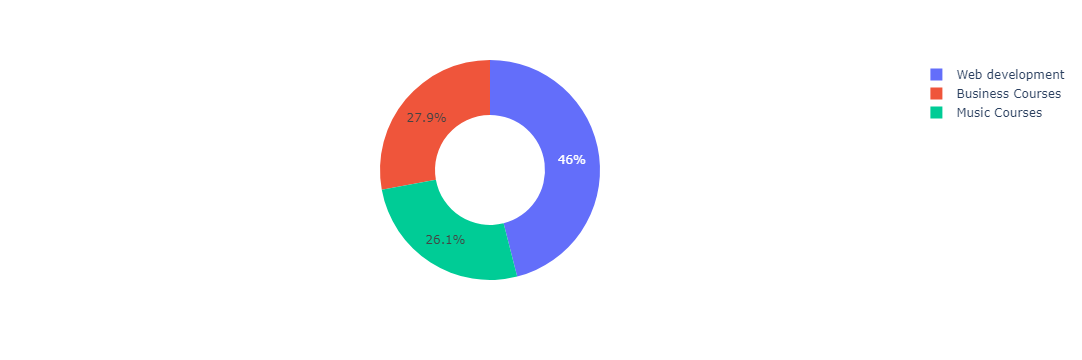

In [19]:
df['Category'] = df['Category'].str.split(': ').str[-1]
df['Category'] = df['Category'].str.lstrip(' ')

subject = df['Category'].value_counts()

print(df['Category'].value_counts())
figure = px.pie(df, 
                values = subject.values,
                names = subject.index,
                hole = 0.5)
figure.show()

Web Development courses were generally more expensive closely followed by Business Finance courses. Nevertheless, Web Development courses had more subscribers and above average rating. The best rated courses are in Business and Graphics.

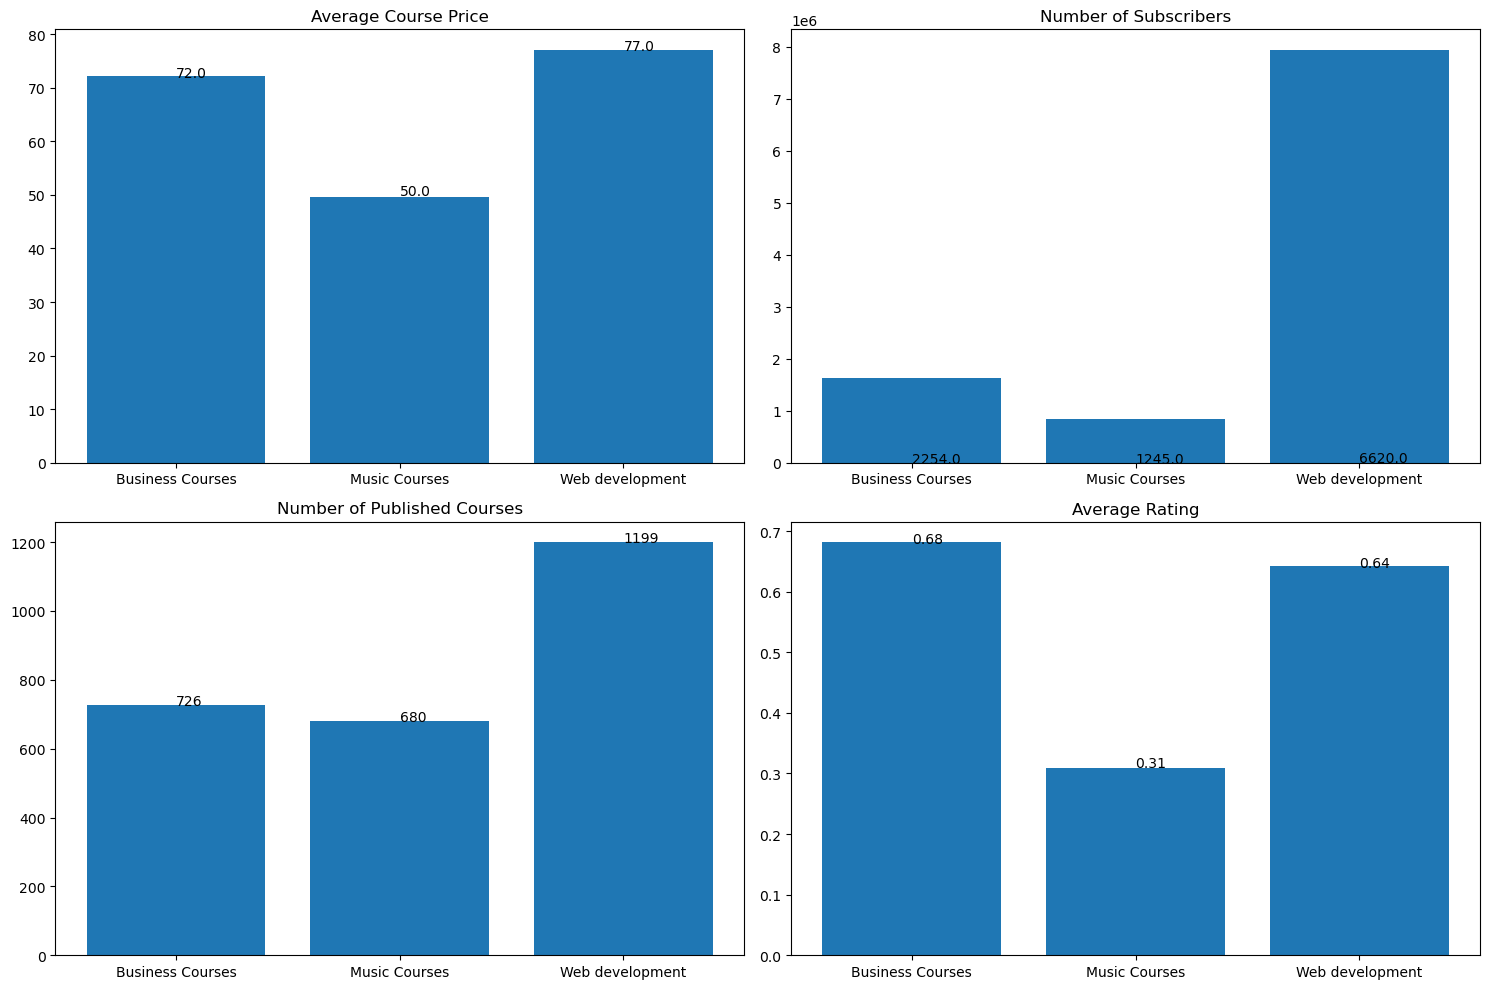

In [20]:
#course price vs number of subsribers
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize=(15,10))

values = df.groupby('Category')['price'].mean().round()
ax0.bar(df.groupby('Category')['price'].mean().index, df.groupby('Category')['price'].mean())
ax0.set_title('Average Course Price')
[ax0.text(index, value, str(value)) for index, value in enumerate(values)]

values = df.groupby('Category')['num_subscribers'].mean().round()    
ax1.bar(df.groupby('Category')['num_subscribers'].sum().index, df.groupby('Category')['num_subscribers'].sum())
ax1.set_title('Number of Subscribers')
[ax1.text(index, value, str(value)) for index, value in enumerate(values)]

values = df.groupby('Category')['course_title'].count()
ax2.bar(df.groupby('Category')['course_title'].count().index, df.groupby('Category')['course_title'].count())
ax2.set_title('Number of Published Courses')
[ax2.text(index, value, str(value)) for index, value in enumerate(values)]

values = df.groupby('Category')['Rating'].mean().round(2)
ax3.bar(df.groupby('Category')['Rating'].mean().index, df.groupby('Category')['Rating'].mean())
ax3.set_title('Average Rating')
[ax3.text(index, value, str(value)) for index, value in enumerate(values)]

plt.tight_layout()
plt.show()  

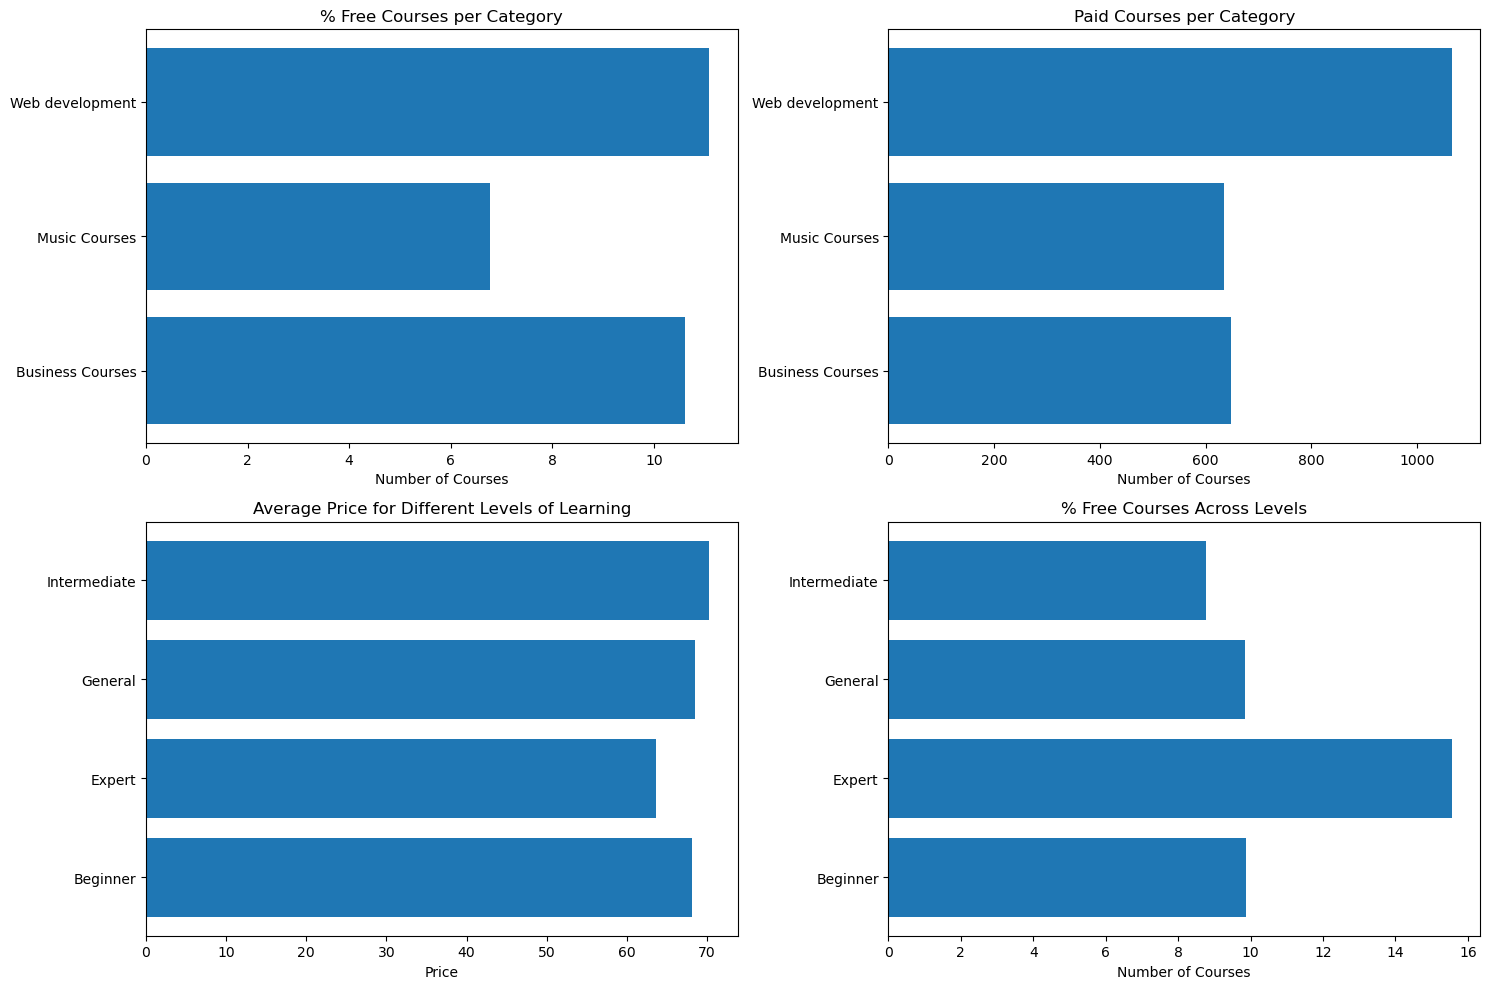

In [21]:
#revenue generation by subject and by course
fig, ((ax0,ax1), (ax2,ax3)) = plt.subplots(2,2 ,figsize=(15,10))

df_free = df.query('price == 0')
(ax0.barh(df_free.groupby('Category')['course_title'].count().index, 
          100*df_free.groupby('Category')['course_title'].count()/
          df.groupby('Category')['course_title'].count()))
ax0.set_title('% Free Courses per Category')
ax0.set_xlabel('Number of Courses')

df_paid = df.query('price != 0')
ax1.barh(df_paid.groupby('Category')['course_title'].count().index, df_paid.groupby('Category')['course_title'].count())
ax1.set_title('Paid Courses per Category')
ax1.set_xlabel('Number of Courses')

ax2.barh(df.groupby('level')['price'].mean().index, df.groupby('level')['price'].mean())
ax2.set_title('Average Price for Different Levels of Learning')
ax2.set_xlabel('Price')

df_free = df.query('price == 0')
(ax3.barh(df_free.groupby('level')['course_title'].count().index, 
          100*df_free.groupby('level')['course_title'].count()/
          df.groupby('level')['course_title'].count()))
ax3.set_title('% Free Courses Across Levels')
ax3.set_xlabel('Number of Courses')

plt.tight_layout()
plt.show()

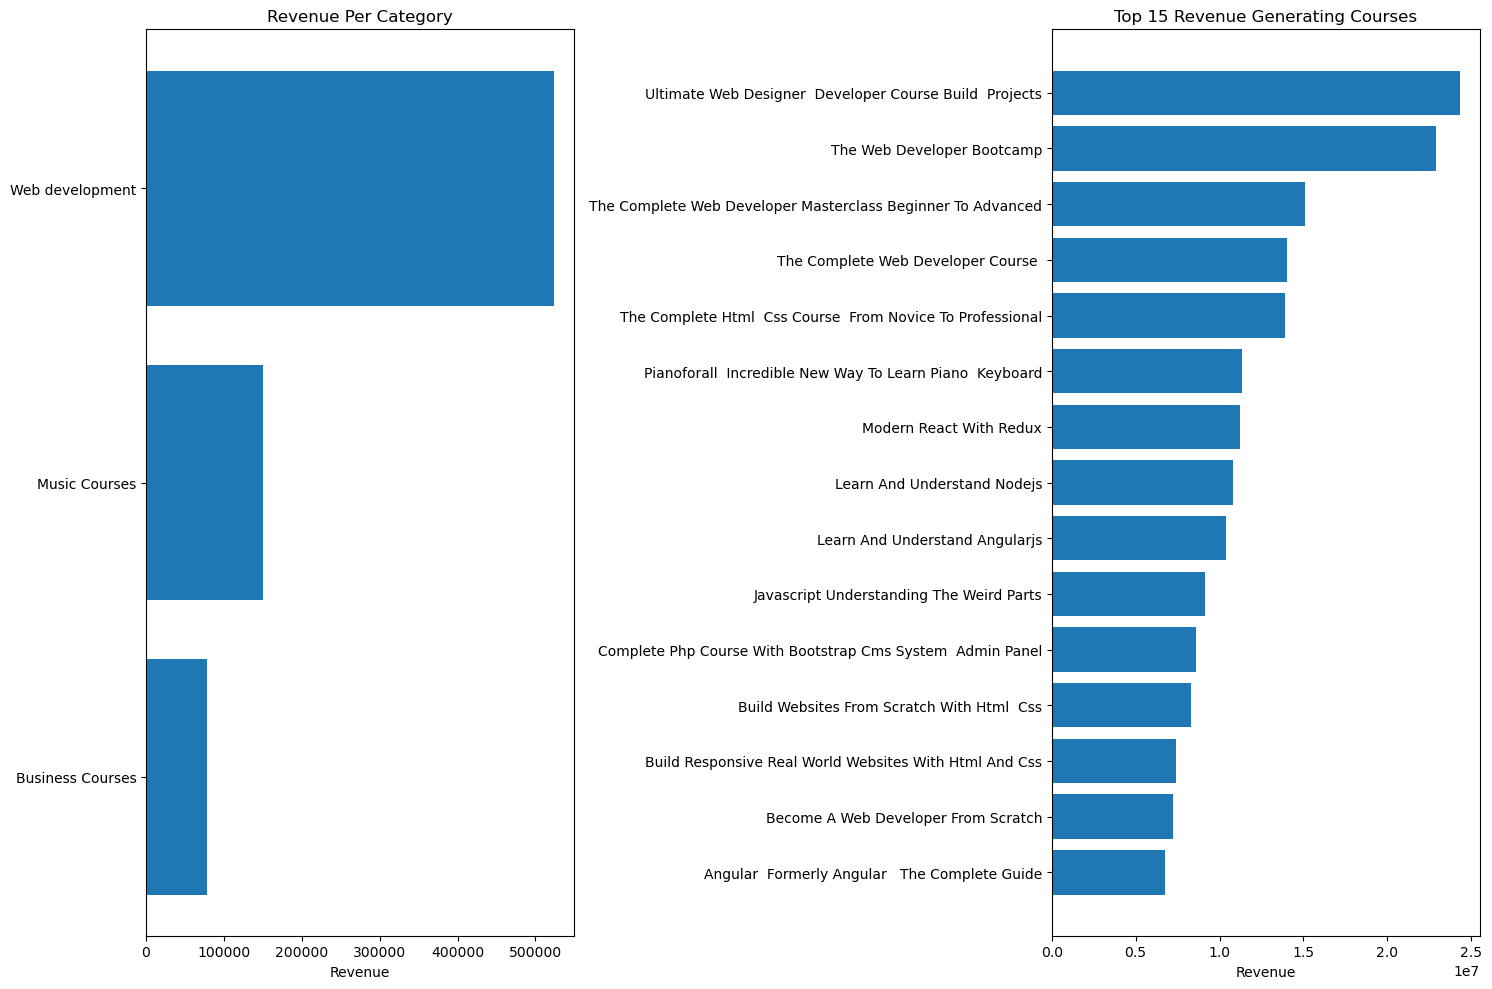

In [22]:
#revenue generation by Category and by course
fig, ((ax0), (ax1)) = plt.subplots(1, 2, figsize=(15,10))
(ax0.barh(df.groupby('Category')['revenue'].sum().index, sorted(df.groupby('Category')['revenue'].mean())))
ax0.set_title('Revenue Per Category')
ax0.set_xlabel('Revenue')
#sort the dataframe by revenue generated and courses and plot top 15
df_rev = df[['course_title', 'revenue']].sort_values('revenue', ascending=False).head(15)
(ax1.barh(df_rev.head(15).groupby('course_title')['revenue'].sum().index, 
          sorted(df_rev.head(15).groupby('course_title')['revenue'].sum())))
ax1.set_title('Top 15 Revenue Generating Courses')
ax1.set_xlabel('Revenue')
plt.tight_layout()
plt.show()

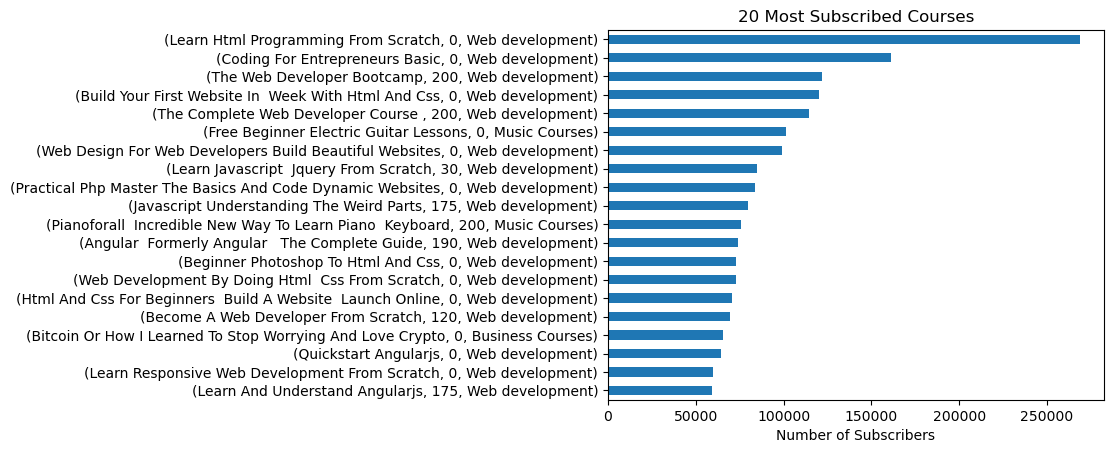

In [23]:
#plot of the courses by number of subscribers
df_sub = df.sort_values('num_subscribers', ascending=False).head(20)
df_sub.groupby(['course_title', 'price','Category'])['num_subscribers'].sum().sort_values().plot(kind='barh')
plt.title('20 Most Subscribed Courses')
plt.ylabel('')
plt.xlabel('Number of Subscribers')
plt.rcParams["figure.figsize"] = (10, 12)
plt.show()

C:\Users\Austin\AppData\Local\Temp\ipykernel_16952\4097811236.py:5: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



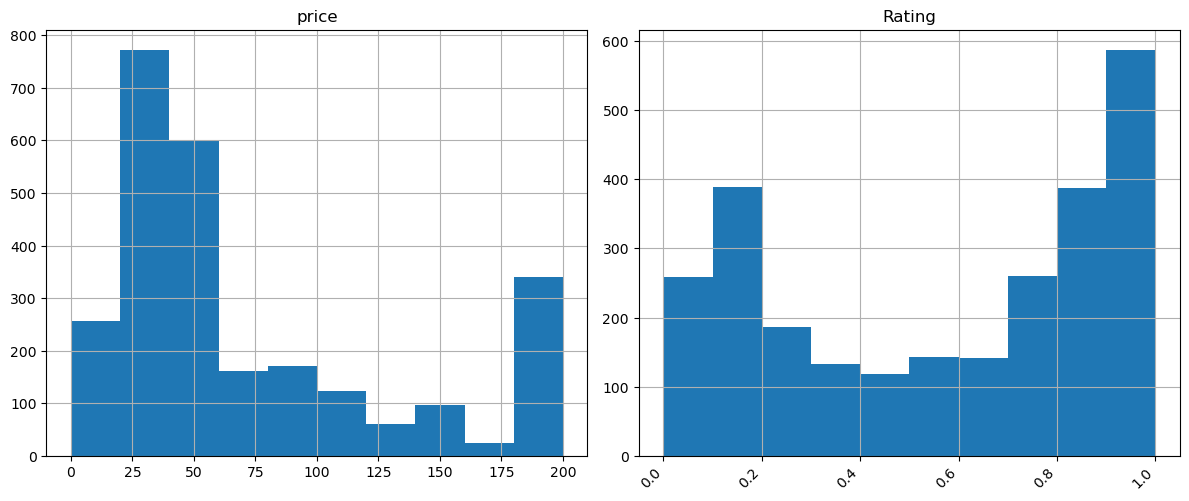

In [24]:
#distribution chart of selected attributes
fig = plt.figure(figsize = (12,5))
ax = fig.gca()

df[['price', 'Rating']].hist(ax = ax)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
warnings.filterwarnings("ignore")

plt.show()

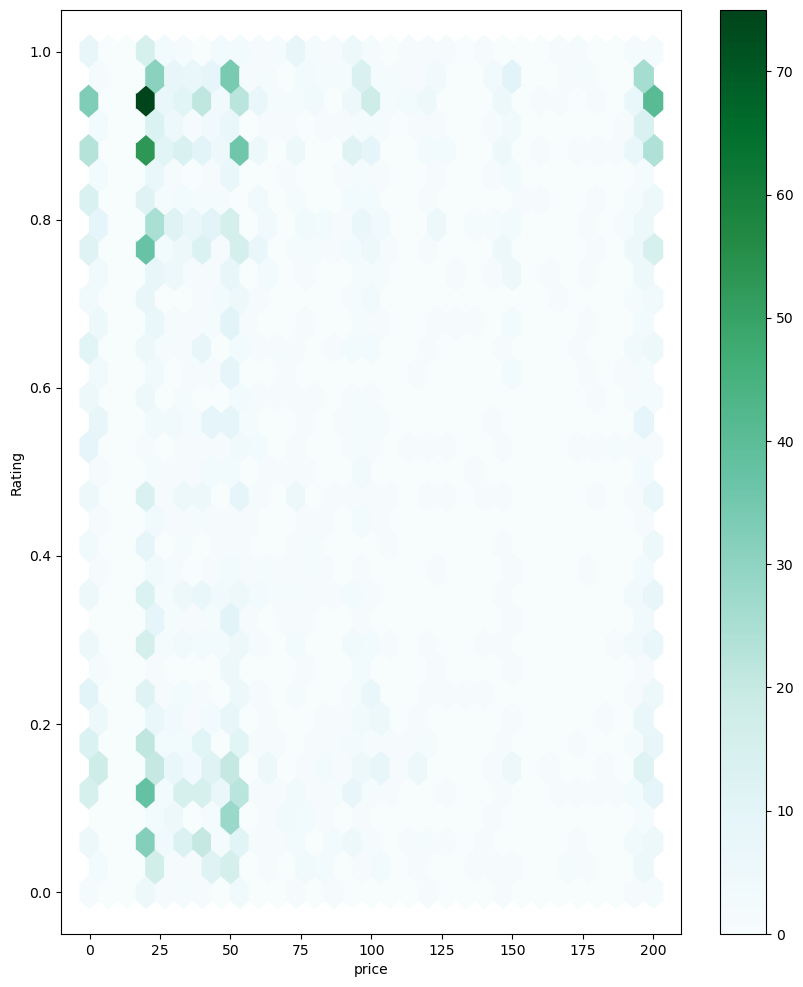

In [25]:
df.plot.hexbin(x='price', y='Rating', gridsize=30)
plt.show()

Category
Business Courses    72.169421
Music Courses       49.558824
Web development     77.035029
Name: price, dtype: float64


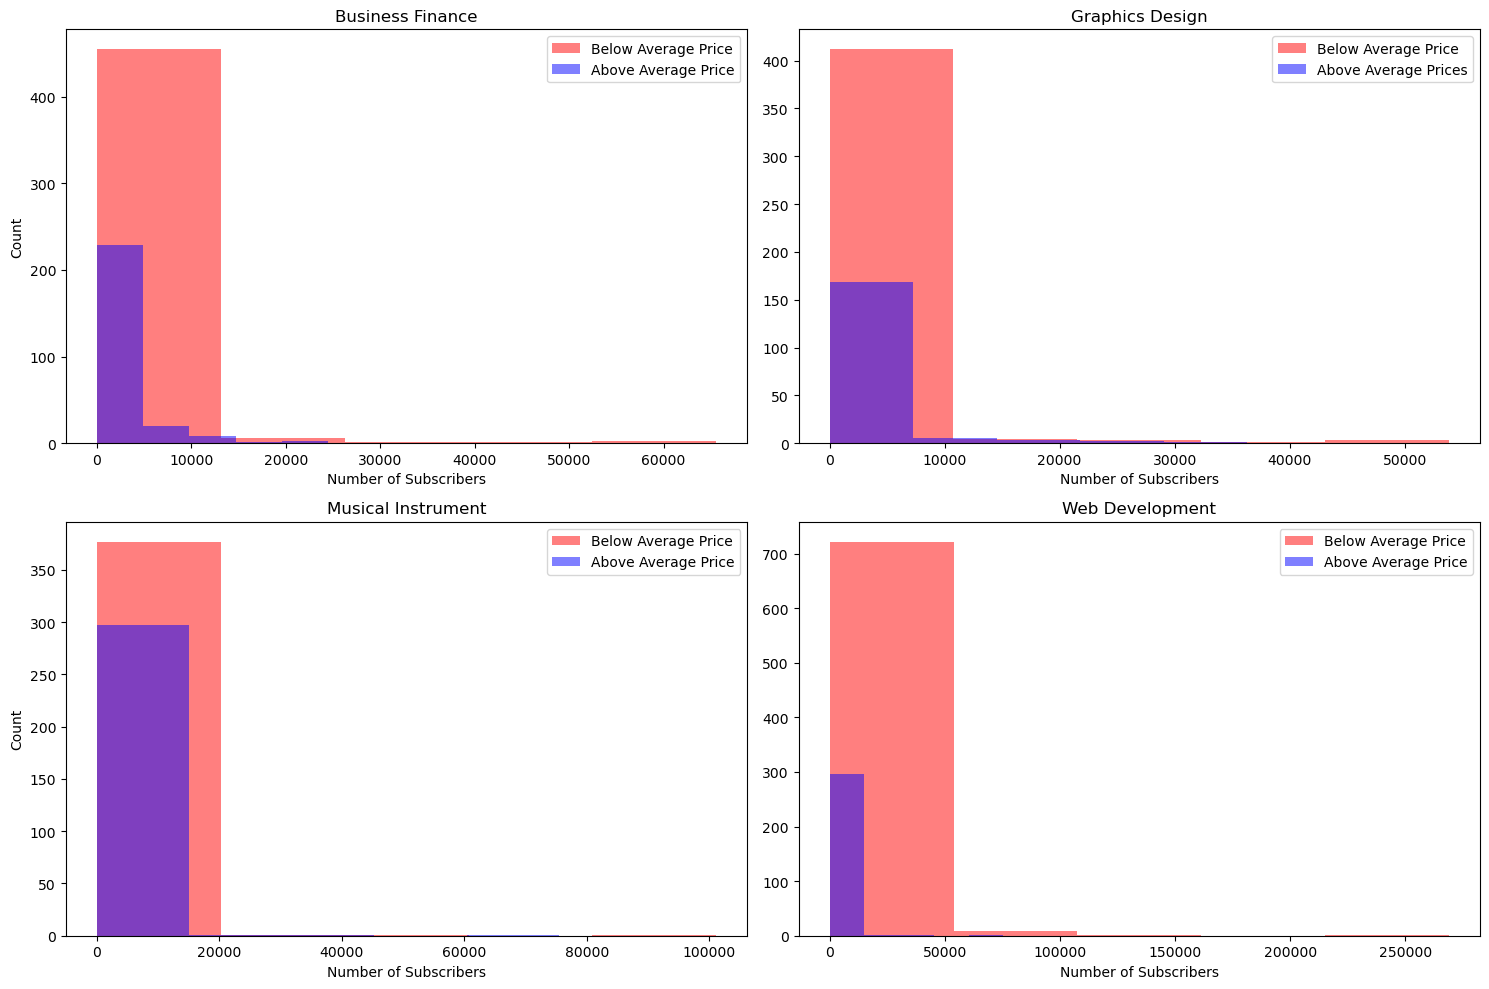

In [26]:
#average price of course per category
print(df.groupby('Category')['price'].mean())

#use power query to categorize dataset based on the average price
below_biz = df_biz.query('price < 68.694374')
above_biz = df_biz.query('price >= 68.694374')

below_gfx = df_gfx.query('price < 57.890365')
above_gfx = df_gfx.query('price >= 57.890365')

below_mus = df_mus.query('price < 49.558824')
above_mus = df_mus.query('price >= 49.558824')

below_dev = df_dev.query('price < 77.036575')
above_dev = df_dev.query('price >= 77.036575')

#use this to compare number of courses, rating etc below and above the median(or average) price
#double hist plot function

fig, ((ax0, ax1), (ax2, ax3 )) = plt.subplots(2,2 ,figsize=(15,10))

ax0.hist(below_biz.num_subscribers, 5, color ='r', alpha = 0.5, label='Below Average Price')
ax0.hist(above_biz.num_subscribers, 5, color ='b', alpha = 0.5, label='Above Average Price')
ax0.legend(prop={'size': 10})
ax0.set_xlabel('Number of Subscribers')
ax0.set_ylabel('Count')
ax0.set_title('Business Finance')

ax1.hist(below_gfx.num_subscribers, 5, color ='r', alpha = 0.5, label='Below Average Price')
ax1.hist(above_gfx.num_subscribers, 5, color ='b', alpha = 0.5, label='Above Average Prices')
ax1.legend(prop={'size': 10})
ax1.set_xlabel('Number of Subscribers')
ax1.set_title('Graphics Design')

ax2.hist(below_mus.num_subscribers, 5, color ='r', alpha = 0.5, label='Below Average Price')
ax2.hist(above_mus.num_subscribers,5, color ='b', alpha = 0.5, label='Above Average Price')
ax2.legend(prop={'size': 10})
ax2.set_xlabel('Number of Subscribers')
ax2.set_ylabel('Count')
ax2.set_title('Musical Instrument')

ax3.hist(below_dev.num_subscribers, 5, color ='r', alpha = 0.5, label='Below Average Price')
ax3.hist(above_mus.num_subscribers,5, color ='b', alpha = 0.5, label='Above Average Price')
ax3.legend(prop={'size': 10})
ax3.set_xlabel('Number of Subscribers')
ax3.set_title('Web Development')

fig.tight_layout()
plt.show()

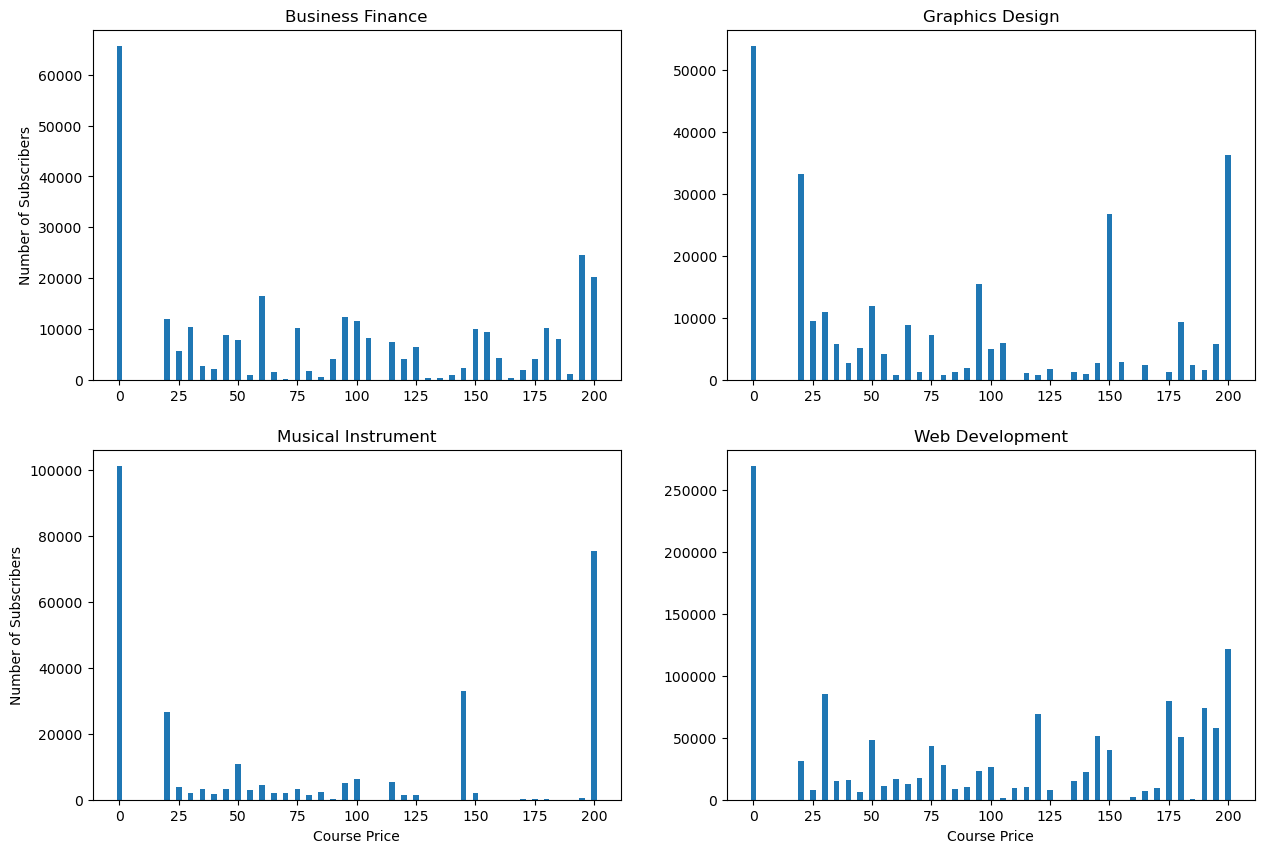

In [27]:
#course price versus number of subscribers
fig, ((ax0, ax1), (ax2, ax3 )) = plt.subplots(2,2 ,figsize=(15,10))

ax0.bar(df_biz.price, df_biz['num_subscribers'], width=2.4)
ax0.set_title('Business Finance')
ax0.set_ylabel('Number of Subscribers')

ax1.bar(df_gfx.price, df_gfx.num_subscribers, width=2.4)
ax1.set_title('Graphics Design')

ax2.bar(df_mus.price, df_mus.num_subscribers, width=2.4)
ax2.set_title('Musical Instrument')
ax2.set_xlabel('Course Price')
ax2.set_ylabel('Number of Subscribers')

ax3.bar(df_dev.price, df_dev.num_subscribers, width=2.4)
ax3.set_title('Web Development')
ax3.set_xlabel('Course Price')

plt.show()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Austin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Austin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


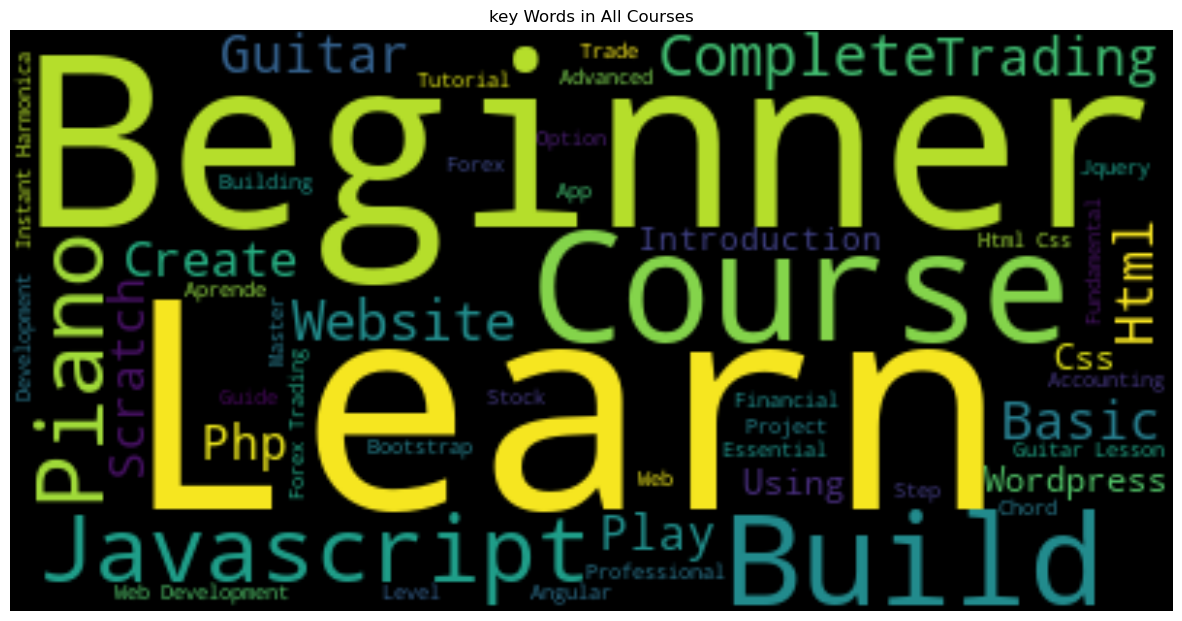

ValueError: We need at least 1 word to plot a word cloud, got 0.

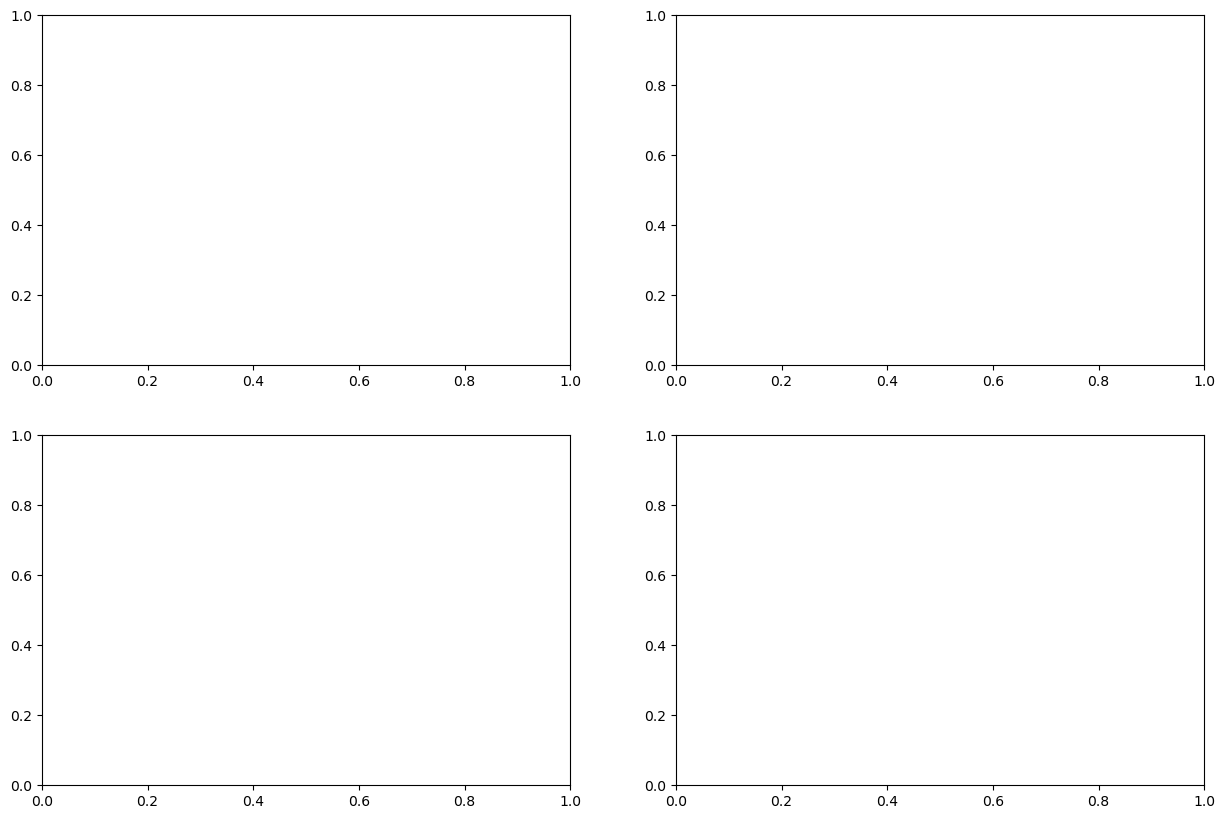

In [28]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
snowball = SnowballStemmer(language = 'english')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
import nltk
nltk.download('stopwords')

#instantiate lemmatize; change words in past to present, third person to first person
wn = WordNetLemmatizer()
    
stopword = set(stopwords.words('english'))

def word_join(text):
    text = (' '.join([word for word in text.split(' ') if word not in stopword]))
    text = ' '.join([wn.lemmatize(word, pos='v') for word in text.split(' ')])
    return text


text = ' '.join(word for word in df['course_title'].apply(word_join))
wordcloud = WordCloud(stopwords = set(STOPWORDS), background_color = 'black', max_words=50).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('key Words in All Courses')
plt.axis('off')
plt.show()

#plot words for the top rated courses
fig, ((ax0, ax1), (ax2, ax3 )) = plt.subplots(2,2 ,figsize=(15,10))

df_bizt = df_biz.query('Rating >= 4 & num_subscribers > 1569') #above average number of subscribers
text = ' '.join(word for word in df_bizt['course_title'].apply(word_join))
wordcloud = WordCloud(stopwords = set(STOPWORDS), background_color = 'black', max_words=50).generate(text)
ax0.imshow(wordcloud, interpolation='bilinear')
ax0.set_title('Keywords in Top Rated Business Finance Courses')
fig.tight_layout()
ax0.axis("off")

df_gfxt = df_gfx.query('Rating >= 4 & num_subscribers > 1766') #above average number of subscribers
text = ' '.join(word for word in df_gfxt['course_title'].apply(word_join))
wordcloud = WordCloud(stopwords = set(STOPWORDS), background_color = 'black', max_words=50).generate(text)
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.set_title('Keywords in Top Rated Graphics Design Courses')
fig.tight_layout()
ax1.axis("off")

df_must = df_mus.query('Rating >= 4 & num_subscribers > 1245') #above average number of subscribers
text = ' '.join(word for word in df_must['course_title'].apply(word_join))
wordcloud = WordCloud(stopwords = set(STOPWORDS), background_color = 'black', max_words=50).generate(text)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.set_title('Keywords in Top Rated Musical Instrument Courses')
fig.tight_layout()
ax2.axis("off")

df_devt = df_dev.query('Rating >= 4 & num_subscribers > 6635') #above average number of subscribers
text = ' '.join(word for word in df_devt['course_title'].apply(word_join))
wordcloud = WordCloud(stopwords = set(STOPWORDS), background_color = 'black', max_words=50).generate(text)
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.set_title('Keywords in Top Rated Web Development Courses')
fig.tight_layout()
plt.axis("off")
warnings.filterwarnings("ignore")
plt.show()

In [ ]:
fig, ((ax0), (ax1)) = plt.subplots(1,2 ,figsize=(15,10))

#paid courses with above average subscription
subject = df[(df['num_subscribers']>3199) & (df['price'] != 'free')]['level'].value_counts()
ax0.pie(subject, autopct='%1.1f%%',   wedgeprops=dict(width=.4))
ax0.legend(df['level'].value_counts().index, title = 'Level')
ax0.set_title('Levels of Paid Courses with above Average Subscription Count')

#paid courses with above average subscription
subject1 = df[(df['num_subscribers']>3199) & (df['price'] != 'free')]['Category'].value_counts()
ax1.pie(subject1, autopct='%1.1f%%',   wedgeprops=dict(width=.4))
ax1.legend(df['Category'].value_counts().index, title = 'Category')
ax1.set_title('Category of Paid Courses with above Average Subscription Count')

plt.show()

In [ ]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2 ,figsize=(15,10))

labels = [0,1,2,3,4,5]

ax0.bar(df_biz.year.value_counts().index,df_biz.year.value_counts().values)
ax0.set_title('Business Finance')

ax1.bar(df_gfx.year.value_counts().index,df_gfx.year.value_counts().values,color='r')
ax1.set_title('Graphic Design')

ax2.bar(df_mus.year.value_counts().index,df_mus.year.value_counts().values,color='y')
ax2.set_title('Musical Instruments')

ax3.bar(df_dev.year.value_counts().index,df_dev.year.value_counts().values, color='c')
ax3.set_title('Web Development')

fig.tight_layout()
plt.show()

# Comments
* The dataset is limited to only four subject areas while leaving out a ton of interesting areas including Data Science, Cyber Security, Cloud Computing, Digital Marketing.* 
The dataset is not updated to the current year, 2022. It would have been nice to see how digital learning grew in the Covi-19 er-
  .* 
There are no demographic data on the subscribers and the duration of their learning of the chosen subjc-t* .
The rating of the courses didnt provide details of the comments made by the subscrbe-r*  s.
It was not expressely stated what the unit of the course duration as - whether hours or inu-t* es.
It was not explained what the scale of the Rating was; does a rating of 0.0 mean there was no rating at all or the course received the least s-c* ore.
There is no data on the content creators; it would have been great to know which tutors make the most subscribed and best rated con#t# ents
Conc-l* usions
Web Development and Graphics Designs have the highest and lowest number of published courss respe-c* tively.
Subscribers are more interested in Web Development courses and least in Musical Intruments- * courses.
Graphics Design courses followed by Business Finance received the bes-t*  ratings.
Web Development courses are more expensive, attractive more subscribers; hence generate the highe-s* t revenue.
The % of the courses that are free ee more in 
-x* pert level.
For courses with high rating and subscriptions, they are courses on Accounting, Forex, Stock in Business Finance; Photoshop, Adobe I lustrator in Graphics Design; Piano and Guitar in Musical Instruments and HTML, CSS, building a Website in Web- * Development.
The courses received high ratings- * across board.
The year 2016 has highest number of courses published cross the diff-e* rent subjects.
For revenue generation, 2014 was the big year for Musical Instruments, 2015 for Business Finance and Web Development while Graphics Design made the most revenue in 2016.